C:\Users\herbe\Documents\1-M-AI\WS2024\Robotics\Docker-ROS-master\catkin_ws\src\Project1\scripts


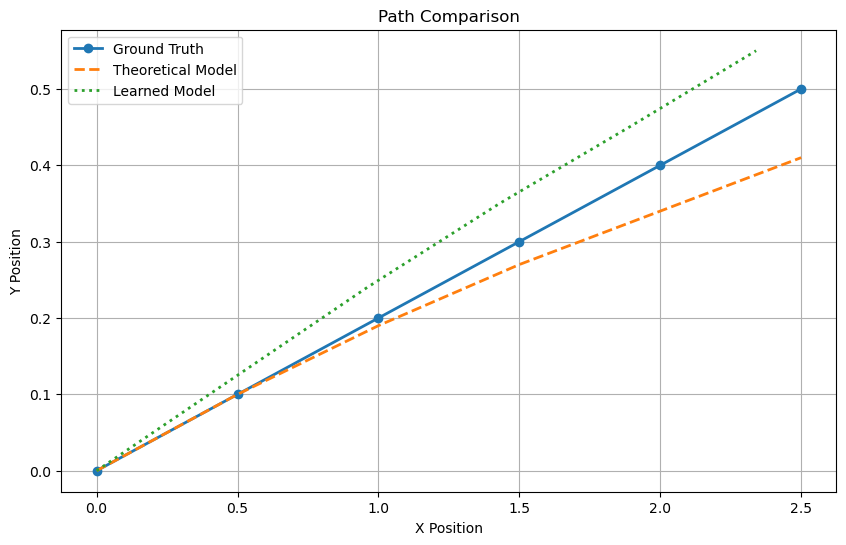

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

# Load paths from CSV files
def load_csv(file_path):
    return pd.read_csv(file_path)

# Plot paths
def plot_paths(ground_truth, theoretical, learned):
    plt.figure(figsize=(10, 6))
    
    # Ground truth
    plt.plot(ground_truth['x'], ground_truth['y'], label="Ground Truth", linewidth=2, linestyle='-', marker='o')
    
    # Theoretical path
    plt.plot(theoretical['x'], theoretical['y'], label="Theoretical Model", linewidth=2, linestyle='--')
    
    # Learned model path
    plt.plot(learned['x'], learned['y'], label="Learned Model", linewidth=2, linestyle=':')
    
    # Plot settings
    plt.title("Path Comparison")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

# File paths
ground_truth_file = "ground_truth.csv"
theoretical_file = "theoretical_path.csv"
learned_file = "learned_path.csv"

# Load data
ground_truth = load_csv( ground_truth_file)
theoretical = load_csv(theoretical_file)
learned = load_csv(learned_file)

# Plot paths
plot_paths(ground_truth, theoretical, learned)


Theoretical Model:
  MAE: 0.0317, RMSE: 0.0460
Learned Model:
  MAE: 0.0766, RMSE: 0.0950


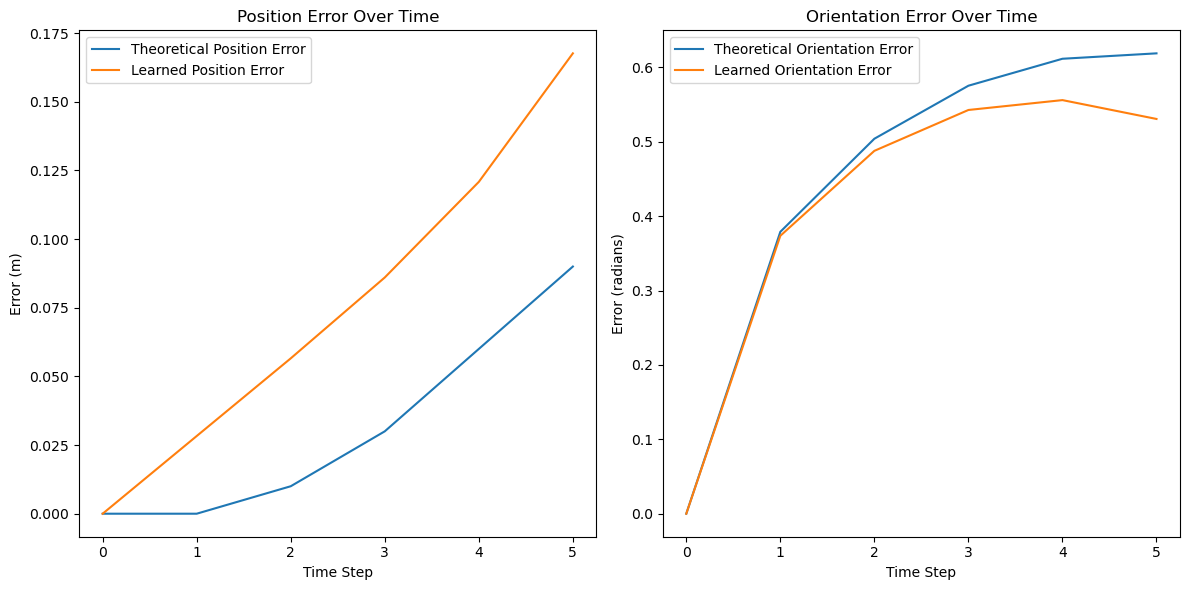

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Load data
ground_truth = pd.read_csv("ground_truth.csv")
theoretical = pd.read_csv("theoretical_path.csv")
learned = pd.read_csv("learned_path.csv")

# Function to calculate Euclidean distance error
def calculate_position_error(gt, pred):
    return np.sqrt((gt['x'] - pred['x'])**2 + (gt['y'] - pred['y'])**2)

# Function to calculate orientation error
def calculate_orientation_error(gt, pred):
    errors = []
    for i in range(len(gt)):
        q_gt = [gt.iloc[i]['orientation_x'], gt.iloc[i]['orientation_y'], gt.iloc[i]['orientation_z'], gt.iloc[i]['orientation_w']]
        q_pred = [pred.iloc[i]['orientation_x'], pred.iloc[i]['orientation_y'], pred.iloc[i]['orientation_z'], pred.iloc[i]['orientation_w']]
        dot_product = np.abs(np.dot(q_gt, q_pred))
        error = 2 * np.arccos(np.clip(dot_product, -1.0, 1.0))
        errors.append(error)
    return np.array(errors)

# Compute position and orientation errors
theoretical_position_error = calculate_position_error(ground_truth, theoretical)
learned_position_error = calculate_position_error(ground_truth, learned)

theoretical_orientation_error = calculate_orientation_error(ground_truth, theoretical)
learned_orientation_error = calculate_orientation_error(ground_truth, learned)

# Statistical metrics
def compute_metrics(errors):
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    return mae, rmse

# Metrics for theoretical
theoretical_mae, theoretical_rmse = compute_metrics(theoretical_position_error)
learned_mae, learned_rmse = compute_metrics(learned_position_error)

# Display results
print("Theoretical Model:")
print(f"  MAE: {theoretical_mae:.4f}, RMSE: {theoretical_rmse:.4f}")

print("Learned Model:")
print(f"  MAE: {learned_mae:.4f}, RMSE: {learned_rmse:.4f}")

# Plot errors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(theoretical_position_error, label="Theoretical Position Error")
plt.plot(learned_position_error, label="Learned Position Error")
plt.title("Position Error Over Time")
plt.xlabel("Time Step")
plt.ylabel("Error (m)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theoretical_orientation_error, label="Theoretical Orientation Error")
plt.plot(learned_orientation_error, label="Learned Orientation Error")
plt.title("Orientation Error Over Time")
plt.xlabel("Time Step")
plt.ylabel("Error (radians)")
plt.legend()

plt.tight_layout()
plt.show()
